# 微积分

<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#导数和微分" data-toc-modified-id="导数和微分-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>导数和微分</a></span></li><li><span><a href="#偏导数" data-toc-modified-id="偏导数-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>偏导数</a></span></li><li><span><a href="#梯度" data-toc-modified-id="梯度-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>梯度</a></span></li><li><span><a href="#链式法则" data-toc-modified-id="链式法则-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>链式法则</a></span><ul class="toc-item"><li><span><a href="#练习" data-toc-modified-id="练习-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>练习</a></span></li></ul></li></ul></div>

在2500年前，古希腊⼈把⼀个多边形分成三⻆形，并把它们的⾯积相加，才找到计算多边形⾯积的⽅法。为了求出曲线形状（⽐如圆）的⾯积，古希腊⼈在这样的形状上刻内接多边形。如下图所示，内接多边形的等⻓边越多，就越接近圆。这个过程也被称为逼近法（method of exhaustion）。

![](https://zh.d2l.ai/_images/polygon-circle.svg)
事实上，逼近法就是积分（integral calculus）的起源。2000多年后，微积分的另⼀⽀，微分（differential calculus）被发明出来。在微分学最重要的应⽤是优化问题，即考虑如何把事情做到最好。这种问题在深度学习中是⽆处不在的。

在深度学习中，我们“训练”模型，不断更新它们，使它们在看到越来越多的数据时变得越来越好。通常情况下，变得更好意味着最⼩化⼀个**损失函数（loss function）**，即⼀个衡量“模型有多糟糕”这个问题的分数。 最终，我们真正关⼼的是⽣成⼀个模型，它能够在从未⻅过的数据上表现良好。但“训练”模型只能将模型与我们实际能看到的数据相拟合。因此，我们可以将拟合模型的任务分解为两个关键问题：
- 优化（optimization）：⽤模型**拟合**观测数据的过程；
- 泛化（generalization）：数学原理和实践者的智慧，能够指导我们⽣成出有效性超出⽤于训练的数据集本⾝的模型。

## 导数和微分

我们⾸先讨论导数的计算，这是⼏乎所有深度学习优化算法的关键步骤。在深度学习中，我们通常选择对于模型参数可微的损失函数。简⽽⾔之，对于每个参数，如果我们把这个参数增加或减少⼀个⽆穷⼩的量，可以知道损失会以多快的速度增加或减少

假设我们有⼀个函数$f:\mathbb{R}\Rightarrow\mathbb{R}$，其输⼊和输出都是标量。如果f的导数存在，这个极限被定义为:
$$f'(x)=\lim_{h\rightarrow0}{\frac{f(x+h)-f(x)}{h}}$$
如果$f'(a)$存在，则称$f$在$a$处是可微（differentiable）的。如果$f$在⼀个区间内的每个数上都是可微的，则此函数在此区间中是可微的。我们可以导数$f'(x)$解释为f$(x)$相对于$x$的瞬时（instantaneous）变化率。所谓的瞬时变化率是基于$x$中的变化$h$，且$h$接近0。

为了更好地解释导数，让我们做⼀个实验。定义$u = f(x) = 3x^2 − 4x$如下：

In [1]:
import numpy as np
from matplotlib_inline import backend_inline
import torch

def f(x):
    return 3 * x ** 2 - 4 * x

通过令$x=1$并让$h$接近0，式$\frac{f(x+h)-f(x)}{h}$结果接近2。虽然这个实验不是⼀个数学证明，但稍后会看到，当$x = 1$时，导数$u'$是2。

In [2]:
def numerical_lim(f, x, h):
    return (f(x+h) - f(x)) / h

h = 0.1
for i in range(5):
    print(f'h={h:.5f}, numerical limit={numerical_lim(f, 1, h):.5f}')
    h *= 0.1

h=0.10000, numerical limit=2.30000
h=0.01000, numerical limit=2.03000
h=0.00100, numerical limit=2.00300
h=0.00010, numerical limit=2.00030
h=0.00001, numerical limit=2.00003


让我们熟悉⼀下导数的⼏个等价符号。给定$y = f(x)$，其中$x$和$y$分别是函数$f$的⾃变量和因变量。以下表达式是等价的：
$$f'(x)=y'=\frac{dy}{dx}=\frac{df}{dx}=\frac{d}{dx}f(x)=Df(x)=D_xf(x)$$
其中$\frac{d}{dx}$和$D$是微分运算符，表示微分操作。我们可以使⽤以下规则来对常⻅函数求微分：
- $DC=0$(C是一个常数)
- $Dx^n=nx^{n-1}$(幂律（power rule），n是任意实数)
- $De^x=e^x$
- $D\ln{x}=1/x$
为了微分⼀个由⼀些常⻅函数组成的函数，下⾯的⼀些法则⽅便使⽤。假设函数$f$和$g$都是可微的，$C$是⼀个常数，则：
1. 常数相乘法则
$$\frac{d}{dx}Cf(x)=C\frac{d}{dx}f(x)$$
2. 加法法则
$$\frac{d}{dx}[f(x)+g(x)]=\frac{d}{dx}f(x)+\frac{d}{dx}g(x)$$
3. 乘法法则
$$\frac{d}{dx}[f(x)g(x)]=f(x)\frac{d}{dx}[g(x)]+g(x)\frac{d}{dx}[f(x)]$$
4. 除法法则
$$\frac{d}{dx}\left[\frac{f(x)}{g(x)}\right]=\frac{g(x)\frac{d}{dx}[f(x)]-f(x)\frac{d}{dx}[g(x)]}{[g(x)]^2}$$

我们可以应用以上几个原则来计算$u'=f'(x)=3\frac{d}{dx}x^2-4\frac{d}{dx}x=6x-4$。当$x=1, u'=2$，之前实验也和结果匹配，当$x = 1$时，此导数也是曲线$u = f(x)$切线的斜率。

为了对导数的这种解释进⾏可视化，我们将使⽤`matplotlib`，这是⼀个`Python`中流⾏的绘图库。 要配置`matplotlib`⽣成图形的属性，我们需要定义⼏个函数。在下⾯，**use_svg_display**函数指定matplotlib软件包输出svg图表以获得更清晰的图像。

注意，注释`#@save`是⼀个特殊的标记，会将对应的函数、类或语句保存在d2l包中。因此，以后⽆须重新定义 就可以直接调⽤它们（例如，d2l.use_svg_display()）。

In [3]:
#@save
def use_svg_display():
    """使⽤svg格式在Jupyter中显示绘图"""
    backend_inline.set_matplotlib_formats('svg')

我们定义**set_figsize**函数来设置图表⼤⼩。

In [4]:
from matplotlib import pyplot as plt
#@save
def set_figsize(figsize=(3.5, 2.5)):
    """设置matplotlib的图表⼤⼩"""
    use_svg_display()
    plt.rcParams['figure.figsize'] = figsize

下⾯的**set_axes**函数⽤于设置由`matplotlib`⽣成图表的轴的属性。

In [5]:
#@save
def set_axes(axes, xlabel, ylabel, xlim, ylim, xscale, yscale, legend):
    """设置matplotlib的轴"""
    axes.set_xlabel(xlabel)
    axes.set_ylabel(ylabel)
    axes.set_xscale(xscale) 
    axes.set_yscale(yscale)
    axes.set_xlim(xlim)
    axes.set_ylim(ylim)
    if legend:
        axes.legend(legend)
    axes.grid()

In [6]:
#@save
def plot(X, Y=None, xlabel=None, ylabel=None, legend=None, xlim=None,
         ylim=None, xscale='linear', yscale='linear',
         fmts=('-', 'm--', 'g-.', 'r:'), figsize=(3.5, 2.5), axes=None):
    """绘制数据点"""
    if legend is None:
        legend = []
    
    set_figsize(figsize)
    axes = axes if axes else plt.gca()
    
    # 如果X有⼀个轴，输出True 
    def has_one_axis(X):
        return (hasattr(X, "ndim") and X.ndim == 1 or isinstance(X, list) 
                and not hasattr(X[0], "__len__"))
    if has_one_axis(X):
        X = [X]
    if Y is None:
        X, Y = [[]] * len(X), X
    elif has_one_axis(Y):
        Y = [Y]
    if len(X) != len(Y):
        X = X * len(Y) 
    axes.cla() 
    for x, y, fmt in zip(X, Y, fmts):
        if len(x):
            axes.plot(x, y, fmt) 
        else:
            axes.plot(y, fmt) 
    set_axes(axes, xlabel, ylabel, xlim, ylim, xscale, yscale, legend)

现在我们可以绘制函数$u = f(x)$及其在$x = 1$处的切线$y = 2x − 3$，其中系数2是切线的斜率。

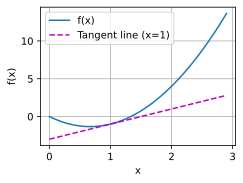

In [7]:
x = np.arange(0, 3, 0.1)
plot(x, [f(x), 2 * x - 3], 'x', 'f(x)', legend=['f(x)', 'Tangent line (x=1)'])

## 偏导数

到⽬前为⽌，我们只讨论了仅含⼀个变量的函数的微分。在深度学习中，函数通常依赖于许多变量。因此，我们需要将微分的思想推⼴到多元函数（multivariate function）上。

设$y=f(x_1, x_2, \dots, x_n)$是一个具有$n$个变量的函数，$y$关于第$i$个参数$x_i$的偏导数（partial derivative）为:

$$\frac{\partial y}{\partial x_i}=\lim_{h\rightarrow 0}\frac{f(x_1,\dots,x_{i-1},x_i+h,x_{i+1}\dots,x_n)-f(x_1,\dots,x_i,\dots,x_n)}{h}$$

为了计算$\frac{\partial y}{\partial x_i}$，我们可以简单的将$x_1, \dots, x_{i-1}, x_{i+1}, \dots, x_n$看作常数，并计算$y$关于$x_i$的导数。对于偏导数的表示以下是等价的：

$$\frac{\partial y}{\partial x_i}=\frac{\partial f}{\partial x_i}=f_{x_i}=f_i=D_if=D_{x_i}f$$

## 梯度

我们可以连结⼀个多元函数对其所有变量的偏导数，以得到该函数的梯度（gradient）向量。具体⽽⾔，设函数$f:\mathbb{R}^n\rightarrow \mathbb{R}$的输入是一个$n$纬的向量$\textbf{x}=[x_1, x_2, \dots, x_n]^\top$，输出是一个标量。函数$f(\textbf{x})$相对于$\textbf{x}$的梯度是包含$n$个偏导师的向量:

$$\nabla_\textbf{x}f(\textbf{x})=\left[\frac{\partial f(\textbf{x})}{\partial x_1}, \frac{\partial f(\textbf{x})}{\partial x_2}, \dots, \frac{\partial f(\textbf{x})}{\partial x_n}\right]^\top$$

其中$\nabla_\textbf{x}f(\textbf{x})$在没有歧视时用$\nabla f(\textbf{x})$代替。

假设$\textbf{x}$为$n$维向量，在微分多元函数时经常使用以下规则：
- 对于所有$\textbf{A}\in\mathbb{R}^{m\times n}$，都有$\nabla_\textbf{x}\textbf{Ax}=\textbf{A}^\top$
- 对于所有$\textbf{A}\in\mathbb{R}^{m\times n}$，都有$\nabla_\textbf{x}\textbf{x}^\top\textbf{A}=\textbf{A}$
- 对于所有$\textbf{A}\in\mathbb{R}^{m\times n}$，都有$\nabla_\textbf{x}\textbf{x}^\top\textbf{Ax}=(\textbf{A}+\textbf{A}^\top)\textbf{x}$
- $\nabla_\textbf{x}{\|\textbf{x}\|}^2=\nabla_\textbf{x}\textbf{x}^\top\textbf{x}=2\textbf{x}$

同样，对于任何矩阵$\textbf{X}$，都有$\nabla_\textbf{X}{\|\textbf{X}\|}_F^2=2\textbf{X}$。正如我们之后将看到的，梯度对于设计深度学习中的优化算法有很⼤⽤处。

## 链式法则

然⽽，上⾯⽅法可能很难找到梯度。这是因为在深度学习中，多元函数通常是复合（composite）的，所以难以应⽤上述任何规则来微分这些函数。幸运的是，链式法则可以被⽤来微分复合函数。

让我们先考虑单变量函数。假设函数$y=f(u)$和$u=g(x)$都是可微的，根据链式法则：

$$\frac{dy}{dx}=\frac{dy}{du}\frac{du}{dx}$$

现在考虑⼀个更⼀般的场景，即函数具有任意数量的变量的情况。假设可微分函数$y$有变量$u_1, u_2, \dots, u_m$，其中每个可微分函数$u_i$都有变量$x_1, x_2, \dots, x_n$。注意，$y$是$x_1, x_2, \dots, x_n$的函数。对于任意$i=1, 2, \dots, n$，链式法则给出：

$$\frac{\partial y}{\partial x_i}=\frac{\partial y}{\partial u_1}\frac{\partial u_1}{\partial x_i}+\frac{\partial y}{\partial u_2}\frac{\partial u_2}{\partial x_i}+\dots+\frac{\partial y}{\partial u_m}\frac{\partial u_m}{\partial x_i}$$

### 练习

- 绘制函数$y=f(x)=x^3−\frac{1}{x}$和其在$x=1$处切线的图像

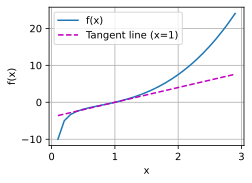

In [8]:
x = np.arange(0.1, 3, 0.1)

def f(x):
    return x**3 - 1/x

plot(x, [f(x), 4 * x - 4], 'x', 'f(x)', legend=['f(x)', 'Tangent line (x=1)'])

- 求函数$f(\textbf{x})=3{x_1}^2+5e^{x_2}$的梯度。
$$\nabla_\textbf{x}f(\textbf{x})=\left[\frac{\partial f(\textbf{x})}{\partial x_1}, \frac{\partial f(\textbf{x})}{\partial x_2}, \dots, \frac{\partial f(\textbf{x})}{\partial x_n}\right]^\top \\
\nabla_\textbf{x}f(\textbf{x})=\left[\frac{\partial f(\textbf{x})}{\partial x_1}, \frac{\partial f(\textbf{x})}{\partial x_2}\right]^\top \\
\nabla_\textbf{x}f(\textbf{x})=\left[6x_1, 5e^{x_2}\right]^\top
$$

- 函数$f(\textbf{x})=\|\textbf{x}\|_2$的梯度是什么？

$$\|\textbf{x}\|_2=\sqrt{\sum_{i=1}^n{x_i}^2} \\
\nabla_\textbf{x}\|\textbf{x}\|_2=\left[\frac{\partial\|\textbf{x}\|_2}{\partial x_1}, \frac{\partial\|\textbf{x}\|_2}{\partial x_2}, \dots, \frac{\partial\|\textbf{x}\|_2}{\partial x_i}, \dots, \frac{\partial\|\textbf{x}\|_2}{\partial x_n}\right]^\top \\
\frac{\partial y}{\partial x_i}=D_if=\frac{df}{dx_i}=\frac{d\|\textbf{x}\|_2}{dx_i} \\
依据 \frac{dy}{dx}=\frac{dy}{du}\frac{du}{dx} \Rightarrow \\
\frac{d\|\textbf{x}\|_2}{dx_i}=\frac{x_i}{\|\textbf{x}\|_2} \Rightarrow \\
\nabla_\textbf{x}f(\textbf{x})=\nabla_\textbf{x}\|\textbf{x}\|_2=\left[\frac{x_1}{\|\textbf{x}\|_2}, \dots, \frac{x_i}{\|\textbf{x}\|_2}, \dots, \frac{x_n}{\|\textbf{x}\|_2}\right]^\top=\frac{\textbf{x}^\top}{\|\textbf{x}\|_2}
$$

- 尝试写出函数$u=f(x, y, z)$，其中$x=x(a, b)，y=y(a, b)，z=z(a, b)$的链式法则

$$\begin{gather}
\frac{\partial y}{\partial x_i}=\frac{\partial y}{\partial u_1}\frac{\partial u_1}{\partial x_i}+\frac{\partial y}{\partial u_2}\frac{\partial u_2}{\partial x_i}+\dots+\frac{\partial y}{\partial u_m}\frac{\partial u_m}{\partial x_i} \Rightarrow \\
\frac{\partial u}{\partial a}=\frac{\partial u}{\partial x}\frac{\partial x}{\partial a}+\frac{\partial u}{\partial y}\frac{\partial y}{\partial a}+\frac{\partial u}{\partial z}\frac{\partial z}{\partial a} \\
\frac{\partial u}{\partial b}=\frac{\partial u}{\partial x}\frac{\partial x}{\partial b}+\frac{\partial u}{\partial y}\frac{\partial y}{\partial b}+\frac{\partial u}{\partial z}\frac{\partial z}{\partial b}
\end{gather}$$

**练习中的$\textbf{x}^\top$表示输入向量为行向量，可以忽略！**